In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import  classification_report
import seaborn as sns
import os

In [2]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:
# Normalize the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0


In [4]:
# Convert class labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



In [5]:
# Displaying the shapes of a preprocessed data.
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


In [6]:
# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

In [7]:
# Custom CNN Model
def create_custom_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [8]:
# ResNet-18 Model from Scratch 
def create_resnet18_model():
    from tensorflow.keras.applications import ResNet50
    base_model = ResNet50(weights=None, input_shape=(32, 32, 3), classes=10)
    return base_model

In [14]:
def create_alexnet_model():
    model = models.Sequential([
        layers.Conv2D(96, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [11]:
# training, and evaluating the model
def train_and_evaluate(model, optimizer_name, model_name):
    if optimizer_name == "SGD":
        optimizer = tf.keras.optimizers.SGD()
    elif optimizer_name == "Adam":
        optimizer = tf.keras.optimizers.Adam()
    elif optimizer_name == "RMSprop":
        optimizer = tf.keras.optimizers.RMSprop()
    else:
        raise ValueError("Unknown optimizer")

   
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Training the model for 5 epochs 
    history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                        epochs=5,
                        validation_data=(x_test, y_test),
                        verbose=1)

    # Evaluating the model
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} with {optimizer_name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    #  model saving
    model.save(f"{model_name}_{optimizer_name}_model.h5")
    print(f"Model saved as {model_name}_{optimizer_name}_model.h5")

    
    return accuracy


Training Custom CNN with SGD optimizer...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step - accuracy: 0.1425 - loss: 2.2630 - val_accuracy: 0.2363 - val_loss: 2.0566
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.2148 - loss: 2.0948 - val_accuracy: 0.2982 - val_loss: 1.9390
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.2554 - loss: 2.0106 - val_accuracy: 0.3468 - val_loss: 1.8253
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.2894 - loss: 1.9270 - val_accuracy: 0.3708 - val_loss: 1.7256
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.3134 - loss: 1.8608 - val_accuracy: 0.3607 - val_loss: 1.7536


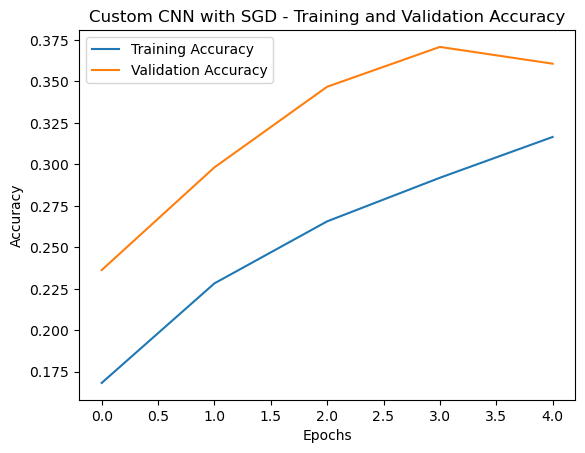

Model saved as Custom CNN_SGD_model.h5

Training Custom CNN with Adam optimizer...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 59ms/step - accuracy: 0.2321 - loss: 2.0277 - val_accuracy: 0.4101 - val_loss: 1.6282
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.3981 - loss: 1.6354 - val_accuracy: 0.5306 - val_loss: 1.2958
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.4641 - loss: 1.4923 - val_accuracy: 0.5624 - val_loss: 1.2237
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.4915 - loss: 1.4183 - val_accuracy: 0.5613 - val_loss: 1.2291
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.5145 - loss: 1.3636 - val_accuracy: 0.5889 - val_loss: 1.1459


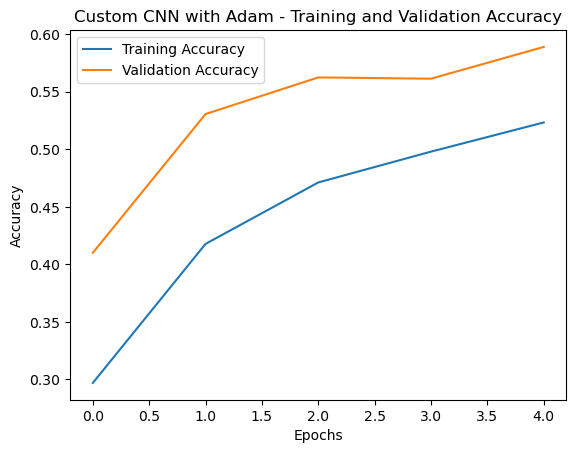

Model saved as Custom CNN_Adam_model.h5

Training Custom CNN with RMSprop optimizer...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - accuracy: 0.2269 - loss: 2.0621 - val_accuracy: 0.4706 - val_loss: 1.4545
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.4037 - loss: 1.6535 - val_accuracy: 0.4710 - val_loss: 1.4542
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.4635 - loss: 1.4910 - val_accuracy: 0.5498 - val_loss: 1.2298
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.5038 - loss: 1.3955 - val_accuracy: 0.6010 - val_loss: 1.1344
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.5322 - loss: 1.3258 - val_accuracy: 0.6259 - val_loss: 1.0481


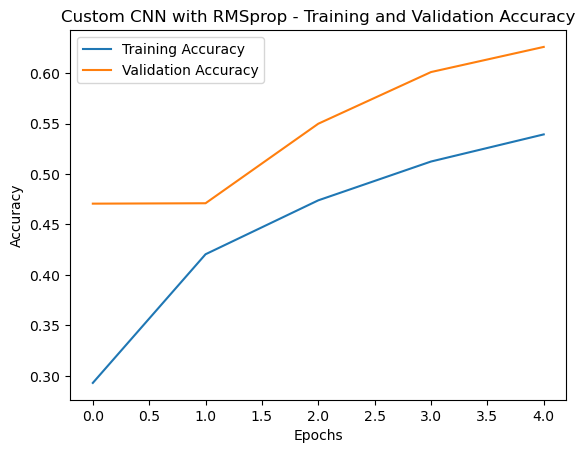

Model saved as Custom CNN_RMSprop_model.h5

Training ResNet-18 with SGD optimizer...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 418s 513ms/step - accuracy: 0.2224 - loss: 2.9194 - val_accuracy: 0.3512 - val_loss: 3.1761
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 377s 482ms/step - accuracy: 0.3366 - loss: 2.1665 - val_accuracy: 0.4215 - val_loss: 2.9457
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 369s 472ms/step - accuracy: 0.3744 - loss: 2.0131 - val_accuracy: 0.3879 - val_loss: 2.0184
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 379s 484ms/step - accuracy: 0.3785 - loss: 1.9743 - val_accuracy: 0.3152 - val_loss: 8.8636
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 369s 471ms/step - accuracy: 0.3425 - loss: 2.0657 - val_accuracy: 0.4251 - val_loss: 3.7996


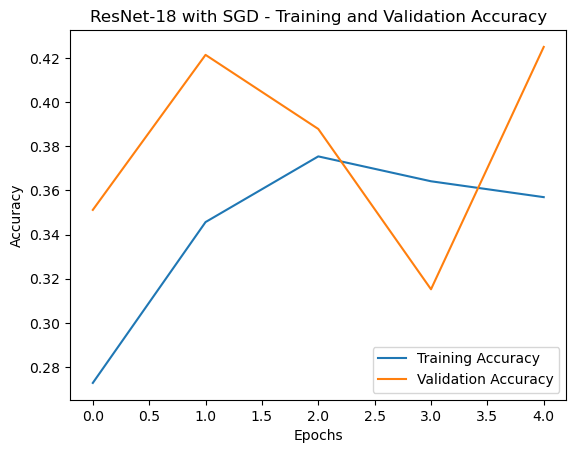

Model saved as ResNet-18_SGD_model.h5

Training ResNet-18 with Adam optimizer...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 510s 617ms/step - accuracy: 0.2629 - loss: 2.4147 - val_accuracy: 0.1261 - val_loss: 12.2278
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 472s 604ms/step - accuracy: 0.2931 - loss: 2.1253 - val_accuracy: 0.1042 - val_loss: 6404.8013
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 476s 609ms/step - accuracy: 0.3057 - loss: 2.1543 - val_accuracy: 0.1694 - val_loss: 2.7235
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 481s 615ms/step - accuracy: 0.3685 - loss: 1.9414 - val_accuracy: 0.3346 - val_loss: 1.8869
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 478s 611ms/step - accuracy: 0.3384 - loss: 1.9913 - val_accuracy: 0.2513 - val_loss: 2.2245


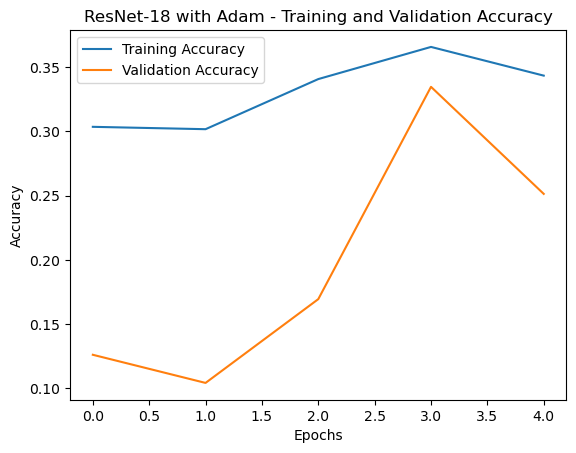

Model saved as ResNet-18_Adam_model.h5

Training ResNet-18 with RMSprop optimizer...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 468s 572ms/step - accuracy: 0.2219 - loss: 2.8002 - val_accuracy: 0.2180 - val_loss: 2.1203
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 434s 554ms/step - accuracy: 0.2768 - loss: 2.2972 - val_accuracy: 0.2286 - val_loss: 2.3177
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 445s 569ms/step - accuracy: 0.3483 - loss: 2.0476 - val_accuracy: 0.2819 - val_loss: 144.1120
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 459s 587ms/step - accuracy: 0.3851 - loss: 1.9709 - val_accuracy: 0.3468 - val_loss: 1.8172
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 477s 609ms/step - accuracy: 0.4420 - loss: 1.7564 - val_accuracy: 0.3637 - val_loss: 61.9801


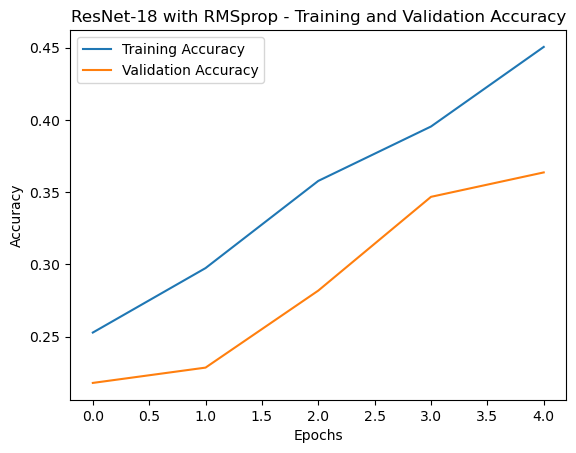

Model saved as ResNet-18_RMSprop_model.h5

Training AlexNet with SGD optimizer...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 468s 597ms/step - accuracy: 0.1197 - loss: 2.2875 - val_accuracy: 0.2274 - val_loss: 2.0547
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 449s 573ms/step - accuracy: 0.2282 - loss: 2.0683 - val_accuracy: 0.3137 - val_loss: 1.9204
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 448s 573ms/step - accuracy: 0.2612 - loss: 1.9914 - val_accuracy: 0.3102 - val_loss: 1.9069
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 477s 609ms/step - accuracy: 0.3125 - loss: 1.8809 - val_accuracy: 0.3730 - val_loss: 1.7464
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 464s 593ms/step - accuracy: 0.3413 - loss: 1.7978 - val_accuracy: 0.4283 - val_loss: 1.5747


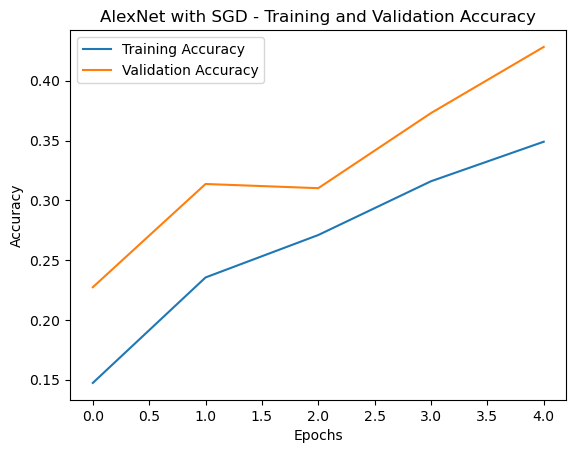

Model saved as AlexNet_SGD_model.h5

Training AlexNet with Adam optimizer...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 610s 775ms/step - accuracy: 0.2041 - loss: 2.1058 - val_accuracy: 0.3666 - val_loss: 1.7424
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 601s 768ms/step - accuracy: 0.4031 - loss: 1.6083 - val_accuracy: 0.4821 - val_loss: 1.4000
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 573s 732ms/step - accuracy: 0.4754 - loss: 1.4282 - val_accuracy: 0.5571 - val_loss: 1.2308
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 563s 719ms/step - accuracy: 0.5238 - loss: 1.3211 - val_accuracy: 0.5850 - val_loss: 1.1762
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 547s 699ms/step - accuracy: 0.5569 - loss: 1.2347 - val_accuracy: 0.5772 - val_loss: 1.2378


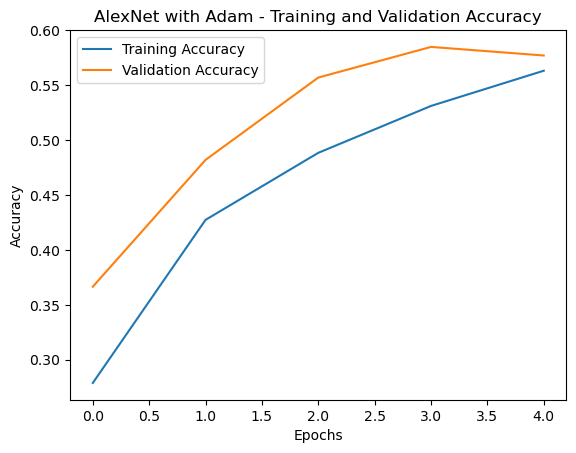

Model saved as AlexNet_Adam_model.h5

Training AlexNet with RMSprop optimizer...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 504s 641ms/step - accuracy: 0.1605 - loss: 2.1947 - val_accuracy: 0.3925 - val_loss: 1.6118
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 504s 644ms/step - accuracy: 0.3814 - loss: 1.6787 - val_accuracy: 0.5279 - val_loss: 1.2782
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 507s 649ms/step - accuracy: 0.4839 - loss: 1.4379 - val_accuracy: 0.5802 - val_loss: 1.1778
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 504s 645ms/step - accuracy: 0.5450 - loss: 1.3035 - val_accuracy: 0.5666 - val_loss: 1.2680
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 503s 643ms/step - accuracy: 0.5865 - loss: 1.1955 - val_accuracy: 0.6493 - val_loss: 1.0522


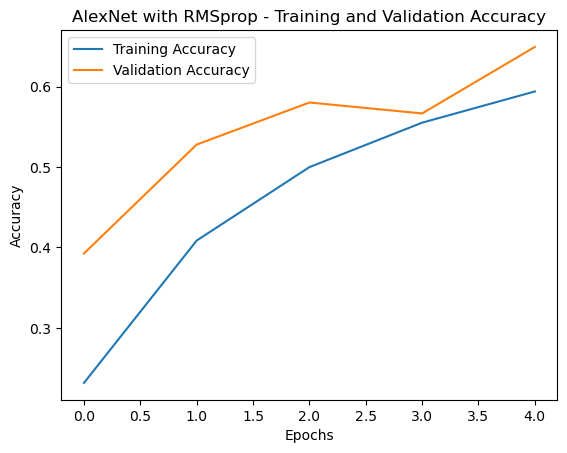

Model saved as AlexNet_RMSprop_model.h5

Best Model: AlexNet with RMSprop with Accuracy: 64.93%


In [30]:
# List of models and optimizers
models_list = [
    ("Custom CNN", create_custom_cnn_model),
    ("ResNet-18", create_resnet18_model),
    ("AlexNet", create_alexnet_model)
]

optimizers_list = ["SGD", "Adam", "RMSprop"]

# storing the results
results = {}

# Training each model with each optimizer and storing the results
for model_name, model_function in models_list:
    for optimizer_name in optimizers_list:
        print(f"\nTraining {model_name} with {optimizer_name} optimizer...")
        model = model_function()
        accuracy = train_and_evaluate(model, optimizer_name, model_name)
        results[f"{model_name} with {optimizer_name}"] = accuracy

# Predicting the best model
best_model = max(results, key=results.get)
best_accuracy = results[best_model]
print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step


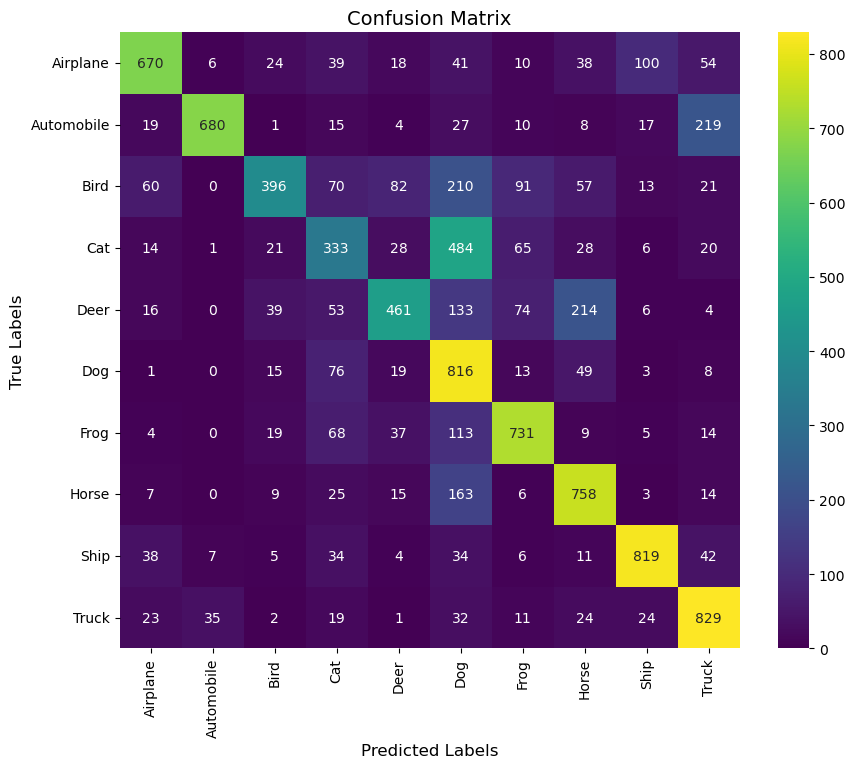

In [42]:
# Generating the predictions 
y_pred_probs = model.predict(x_test)  
y_pred = np.argmax(y_pred_probs, axis=1)  
y_true = np.argmax(y_test, axis=1)  

# the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

# Class names for CIFAR-10 dataset
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]


plot_confusion_matrix(conf_matrix, class_names)

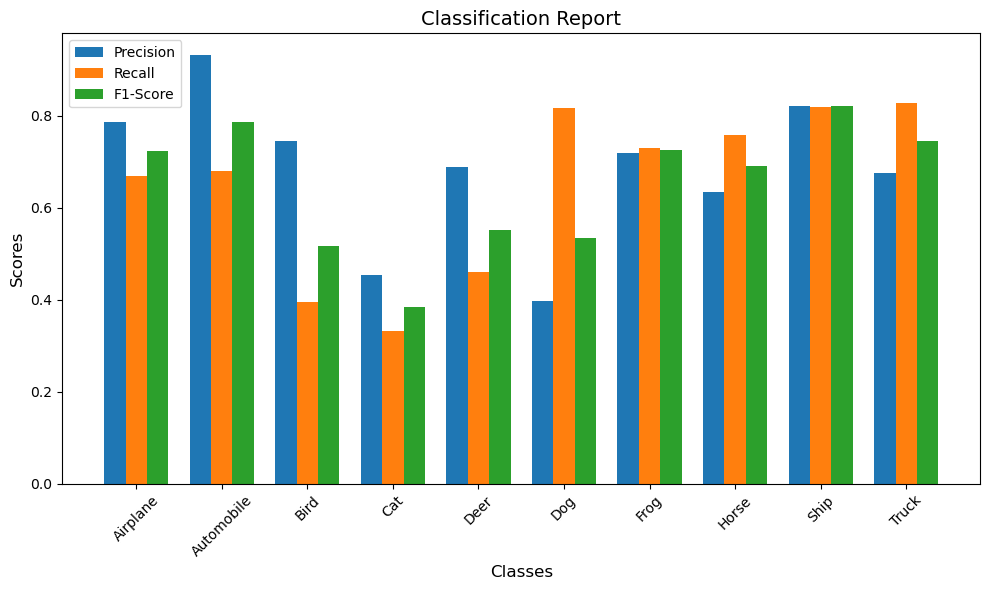

In [44]:
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
# Plotting the classification report
def plot_classification_report(report, class_names):
    plt.figure(figsize=(10, 6))
    precision = [report[label]['precision'] for label in class_names]
    recall = [report[label]['recall'] for label in class_names]
    f1_score = [report[label]['f1-score'] for label in class_names]
    
    # Set up the bar width
    bar_width = 0.25
    index = np.arange(len(class_names))
    
    # Plot the bars
    plt.bar(index, precision, bar_width, label='Precision')
    plt.bar(index + bar_width, recall, bar_width, label='Recall')
    plt.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score')
    
    # the plot
    plt.xlabel('Classes', fontsize=12)
    plt.ylabel('Scores', fontsize=12)
    plt.title('Classification Report', fontsize=14)
    plt.xticks(index + bar_width, class_names, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

#
plot_classification_report(report, class_names)